In [75]:
import json
import os
import sqlite3
import math

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patches

import numpy as np

In [2]:
def jukes_cantor(seq_pair):
    # http://nebc.nerc.ac.uk/bioinformatics/documentation/EMBOSS/programs/html/distmat.html
    
    match = 0
    length = 0
    for char1, char2 in zip(*seq_pair):
        if (char1 != '-') and (char2 != '-'):
            length += 1
            
            if char1 == char2:
                match += 1
                
    if length == 0:
        return None
    
    p_dist = 1 - match / length
    
    dist = -0.75 * math.log(1 - p_dist / 0.75)
    
    return dist    

In [3]:
conn = sqlite3.connect('database.db')
cur = conn.cursor()

In [4]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = [table[0] for table in cur.fetchall()]

In [5]:
genus = {}

for table in tables:
    sql = "SELECT seq1, seq2 FROM {};".format(table)
    cur.execute(sql)
    rows = cur.fetchall()
    
    if len(rows) > 0:
        distances = [jukes_cantor(row) for row in rows]
        genus[table] = np.mean([d for d in distances if d is not None])

In [6]:
genus

{'coccinella_coccinella': 0.05444728124493981,
 'coccinella_endomychus': 0.15611559758333798,
 'coccinella_paraplectana': 0.17844244043274754,
 'coccinella_coelophora': 0.1253012132126571,
 'icimauna_icimauna': 0.10152949174053352,
 'icimauna_plateros': 0.23195204370900294,
 'pauropsalta_pauropsalta': 0.11687790527015803,
 'polybia_polybia': 0.07214048927234386,
 'polybia_pseudosphex': 0.15757811366836122,
 'myrmecotypus_camponotus': 0.2167743836622392,
 'psaphis_dysphania': 0.04738121300164792,
 'apis_apis': 0.061497524664209144,
 'apis_eristalis': 0.20373990260746996,
 'syringogaster_syringogaster': 0.13766197802420788,
 'syringogaster_pseudomyrmex': 0.18727238744868335,
 'xanthocryptus_xanthocryptus': 0.02031590063107122,
 'kikihia_kikihia': 0.06188374907288326,
 'lycus_lycus': 0.0030550082752214477,
 'lycus_elytroleptus': 0.23501060686886452,
 'myrmica_myrmica': 0.08554897099247444,
 'myrmica_phengaris': 0.150108708484578,
 'trichura_trichura': 0.0028941930016707232,
 'trichura_pep

In [14]:
same_genus = {k.split('_')[0].capitalize(): v for k, v in genus.items() if k.split('_')[0] == k.split('_')[1]}

different_genus = {k.split('_')[0].capitalize() + '-' + k.split('_')[1].capitalize(): v for k, v in genus.items() if k.split('_')[0] != k.split('_')[1]}

In [56]:
max_value = max(x for x in genus.values())

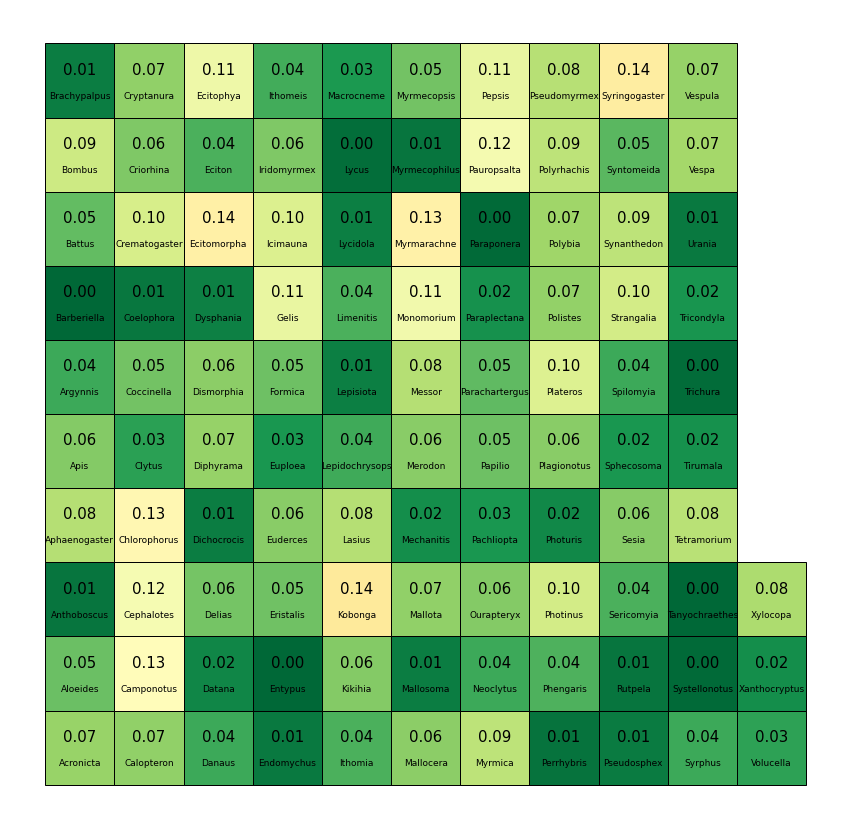

In [95]:
fig, ax = plt.subplots(figsize=(15, 15))

norm = colors.Normalize(vmin=0, vmax=max_value)

cmap = plt.get_cmap('RdYlGn_r')

plt.axis('off')

data = same_genus

rectangles = []

for i, key in enumerate(sorted(data)):
    x = int(i / 10)
    y = i % 10
    
    val = '{:.2f}'.format(data[key])
    color = cmap(norm(data[key]))
    
    text = key.replace('-', '\n')

    ax.text(x + 0.5, y + 0.65, val, ha='center', va='center', fontsize=15)
    ax.text(x + 0.5, y + 0.3, text, ha='center', va='center', fontsize=9)
    
    rect = patches.Rectangle((x, y), 1, 1, linewidth=1, edgecolor='k', facecolor=color)
    rectangles.append(rect)

for rect in rectangles:
    ax.add_patch(rect)

ax.autoscale()

#plt.savefig('mimetic_model.png', dpi=200, bbox_inches='tight')
plt.savefig('konzervovanost.png', dpi=200, bbox_inches='tight')